In [1]:
# Links:

# https://keras.io/api/datasets/cifar100/
# https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [4]:
# Classes

cifar100 = tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="fine")

169001437/169001437 [==============================] - 2s 0us/step


In [5]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
               'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
               'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
               'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
               'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
               'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
               'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
               'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
               'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
               'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark',
               'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
               'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
               'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
               'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
len(train_labels)

50000

In [8]:
train_labels

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [9]:
test_images.shape

(10000, 32, 32, 3)

In [10]:
len(test_images)

10000

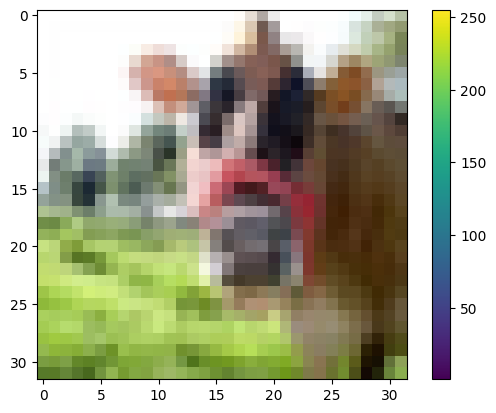

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_labels = np.asarray(train_labels).reshape(-1)

train_labels

array([19, 29,  0, ...,  3,  7, 73])

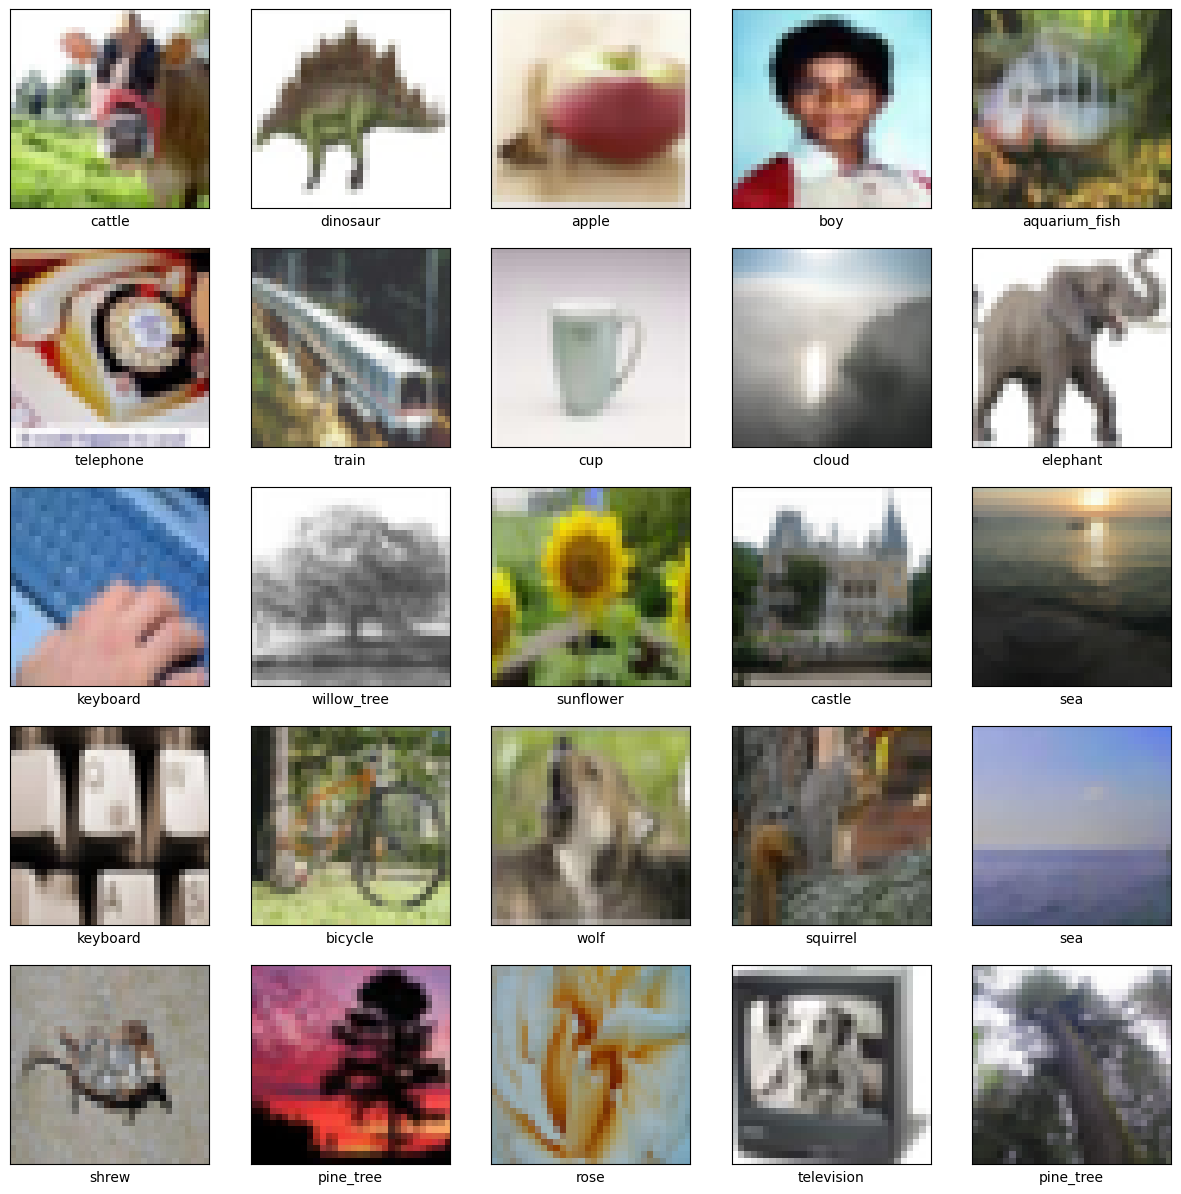

In [13]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap='viridis')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
# Build a CNN

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 14s 5ms/step - loss: 4.3371 - accuracy: 0.0581
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 3.5381 - accuracy: 0.1594
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2048 - accuracy: 0.2175
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.9929 - accuracy: 0.2587
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.8617 - accuracy: 0.2827
Epoch 6/100
1563/1563 [==============================] - 9s 5ms/step - loss: 2.7532 - accuracy: 0.3050
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6578 - accuracy: 0.3218
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5914 - accuracy: 0.3358
Epoch 9/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.5222 - accuracy: 0.3520
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4677

In [17]:
len(class_names)

100

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 2.7910 - accuracy: 0.3660 - 1s/epoch - 3ms/step
\Test accuracy: 0.3659999966621399


In [19]:
probabilifty_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probabilifty_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
predictions[0]

array([0.00989903, 0.00989998, 0.01043808, 0.01008691, 0.01041268,
       0.00996637, 0.00992555, 0.01010447, 0.00998866, 0.00990055,
       0.00990531, 0.01009748, 0.01029969, 0.00990198, 0.00990521,
       0.00992393, 0.00990736, 0.00990833, 0.00998436, 0.00994144,
       0.00990362, 0.00997053, 0.00990252, 0.00992862, 0.01012811,
       0.00995203, 0.00992049, 0.00996882, 0.00990301, 0.00991188,
       0.0108042 , 0.00992013, 0.00990094, 0.00990876, 0.00991757,
       0.01031144, 0.00990073, 0.00992917, 0.01030756, 0.00990438,
       0.00995876, 0.00995999, 0.00991063, 0.00992133, 0.01028392,
       0.01049319, 0.0101401 , 0.00989992, 0.0099016 , 0.00990532,
       0.009971  , 0.00990912, 0.00989896, 0.00989894, 0.00991691,
       0.0101184 , 0.00992889, 0.00990117, 0.00990041, 0.00998387,
       0.00989988, 0.00990091, 0.00989897, 0.00996409, 0.0099183 ,
       0.00995303, 0.00996771, 0.00991932, 0.00993881, 0.00992163,
       0.00989961, 0.0099002 , 0.01080104, 0.00992444, 0.00993

In [22]:
np.argmax(predictions[0])

30

In [23]:
test_labels[0]

array([49])

In [31]:
def plot_image(i, preidctions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(preidctions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(preidctions_array),
                                       class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(100))
  plt.yticks([])
  thisplot = plt.bar(range(100), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [32]:
test_labels = np.asarray(test_labels).reshape(-1)

test_labels

array([49, 33, 72, ..., 51, 42, 70])

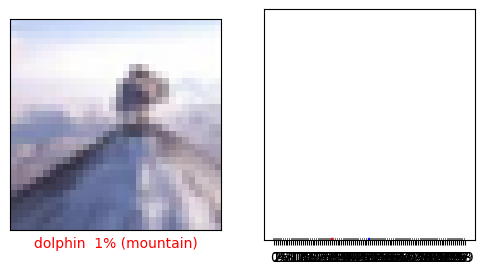

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

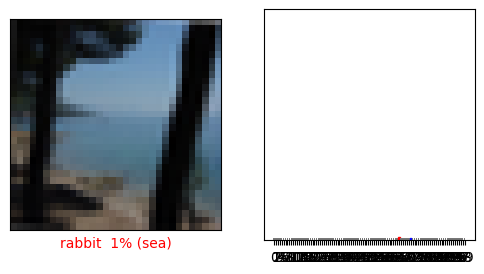

In [34]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

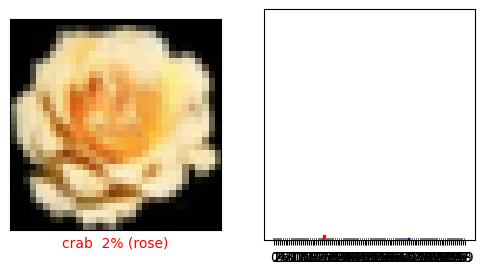

In [35]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

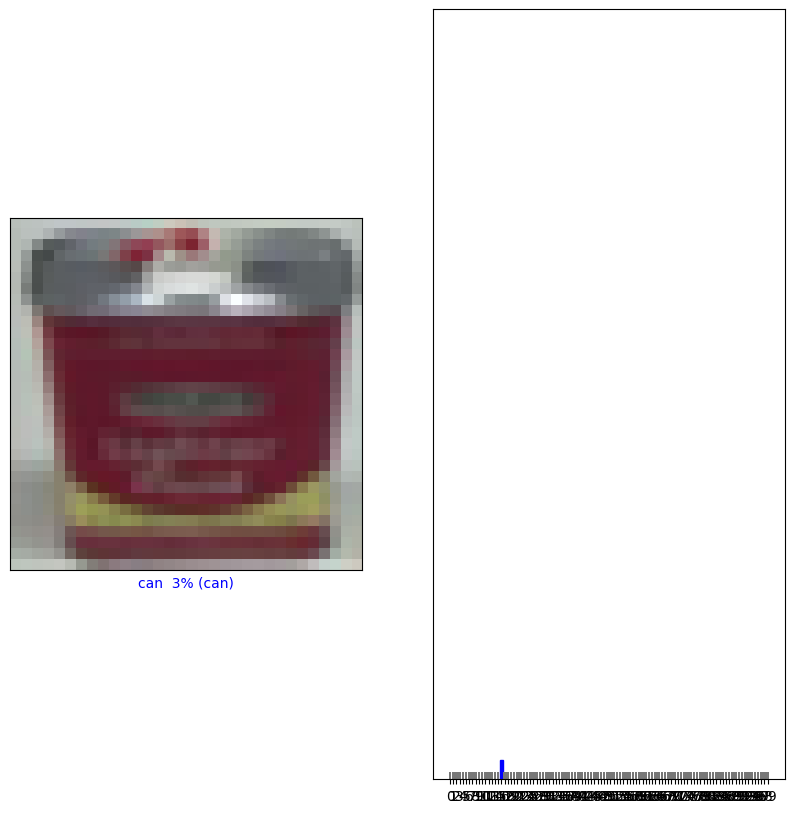

In [47]:
i = 25
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [37]:
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [38]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 32, 32, 3)


In [39]:
predictions_single = probabilifty_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 395ms/step
[[0.00990303 0.00989898 0.00990417 0.01014298 0.00997506 0.00989762
  0.00990057 0.00989654 0.00990184 0.00990624 0.00989677 0.00990377
  0.00993381 0.00989848 0.00989661 0.01024842 0.00989817 0.00991097
  0.00991368 0.0099502  0.0098964  0.00989831 0.00989665 0.00989713
  0.00989663 0.00990174 0.00989707 0.00994927 0.00989667 0.01008203
  0.00989725 0.01099447 0.00990876 0.01176289 0.01000349 0.00991197
  0.00995994 0.00994369 0.01017339 0.00989767 0.00989741 0.00989647
  0.01004441 0.00991563 0.00990028 0.00990991 0.00989835 0.00994037
  0.00989635 0.00989668 0.00990703 0.01000368 0.00990343 0.00989637
  0.00989894 0.00990359 0.01100614 0.00990869 0.00989663 0.01018999
  0.0099007  0.00989636 0.00989638 0.0103515  0.00990118 0.01008468
  0.00991575 0.00990033 0.00990956 0.00992506 0.00989674 0.00989772
  0.00998466 0.00989801 0.0099125  0.0098965  0.00991521 0.00992759
  0.00989717 0.00990524 0.01111796 0.0099066  0.0098981  0.0099

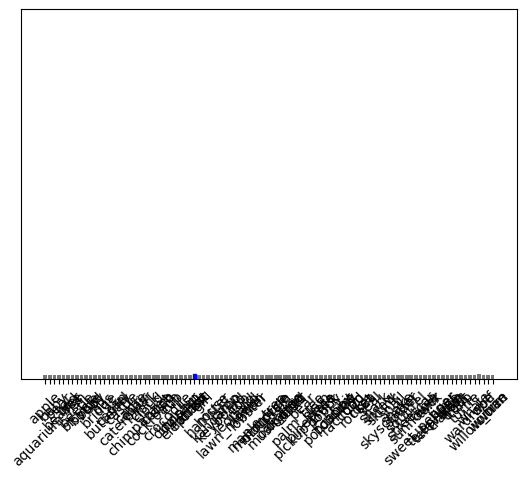

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(100), class_names, rotation=45)
plt.show()

In [46]:
np.argmax(predictions_single[0])

33